#<center>**BC3409: AI in Accounting & Finance Report**</center>

<center>

![](https://therightnewsnetwork.com/wp-content/uploads/2019/03/TRNN-Revelations-Finance.png)
</center>

#**Prediction of Financial Well-being Score for Financial Intervention**

**Data Source** 

https://www.kaggle.com/anthonyku1031/nfwbs-puf-2016-data

**Context**

Understanding factors that support consumer financial well-being can help practitioners and policymakers empower more families to lead better financial lives to serve their own goals.

A person’s financial well-being comes from their sense of financial security and freedom of choice—both in the present and when considering the future. We measured it using our 10-item Financial Well-Being Scale.

The survey dataset includes respondents’ scores on that scale, as well as measures of individual and household characteristics that research suggests may influence adults’ financial well-being.

**Content**

Variables relating to question in this dataset include Income and employment, Savings and safety nets, Past financial experiences, and Financial behaviors, skills, and attitudes.

For reference on specific fields, a codebook is available online [here](https://s3.amazonaws.com/files.consumerfinance.gov/f/documents/cfpb_nfwbs-puf-codebook.pdf).

**Acknowledgements**

This survey was originally conducted by the US Consumer Finance Protection Bureau and published online in October 2017 [here](https://www.consumerfinance.gov/data-research/financial-well-being-survey-data/).

--------------------------------------------------------------------------------


#**Machine Learning Project Workflow**

![](https://miro.medium.com/max/494/1*jTtsaUQVOf8Nu02RlUwNAQ.jpeg)

**Data Preparation and Understanding**

- Data Set Loading

- Exploratory Data Analysis

- Data Preprocessing

  - Data Cleaning
    - Removal of Missing Values
    - Removal of Duplicates
    - Data Type Conversion
    - Removal of Rows with Negative FWBscore

  - Discretization of the Target Variable

  - Feature Selection
    - Removal of Unique ID Column
    - Removal of Columns Used to Adjust for Demographic and Poverty Differences
    - Removal of Direct Survey Questions for FWBscore
    - Removal of Secondary Survey Score Columns
    - Removal of Survey Items with Incomplete Base 

**Model Development and Evaluation**

- Model Development

- Model Evaluation

--------------------------------------------------------------------------------

#**Data Preparation and Understanding**

![](https://kapost-files-prod.s3.amazonaws.com/uploads/asset/file/580a3a65056987c7a6000136/DataConnect_embed.jpg)

##**Data Set Loading**
![](https://icon-library.com/images/data-ingestion-icon/data-ingestion-icon-0.jpg)

Import libraries required for data ingestion, visualization and manipulation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

# Show all rows for dataframe
pd.set_option('display.max_rows', None)

Load data into Pandas DataFrame from CSV file

In [5]:
df = pd.read_csv("NFWBS_PUF_2016_data (1).csv")

View the data and check the dimensions

In [6]:
df.head(5)

,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
0,10350,2,3,5,5,6,55,3,3,3,...,1,4,8,0,0,0,0,1,0,0.367292
1,7740,1,3,6,6,6,51,2,2,3,...,1,2,3,0,0,0,0,2,0,1.327561
2,13699,1,3,4,3,4,49,3,3,3,...,1,4,9,0,0,0,1,2,1,0.835156
3,7267,1,3,6,6,6,49,3,3,3,...,1,3,7,0,0,0,0,1,0,1.410871
4,7375,1,3,4,4,4,49,3,3,3,...,1,2,4,0,0,1,0,4,1,4.260668


In [7]:
print("Number of rows: {}\nNumber of columns: {}".format(df.shape[0], df.shape[1]))

Number of rows: 6394
Number of columns: 217


Examine the data types of all columns
- 2 unique data types: **int64** and **float 64**
- All int64 except for **KHscore** and **finalwt**

In [8]:
for index, dtype in enumerate(df.dtypes.unique()):
  print("Unique data type {}: {}".format(index + 1, dtype))

Unique data type 1: int64
Unique data type 2: float64


In [10]:
pd.DataFrame(df.dtypes, columns = ["Data Type"])

,Data Type
PUF_ID,int64
sample,int64
fpl,int64
SWB_1,int64
SWB_2,int64
SWB_3,int64
FWBscore,int64
FWB1_1,int64
FWB1_2,int64
FWB1_3,int64


##**Exploratory Data Analysis**

Basic statistical summary

In [11]:
df.describe()

,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
count,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,...,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000,6394.000000
mean,10892.392712,1.279794,2.658899,5.353769,5.362215,5.432280,56.034094,3.048014,3.191899,2.531279,...,0.866124,2.644823,5.145605,0.035815,0.078511,0.129653,0.122928,2.084298,-0.081952,1.000000
std,1967.854493,0.570187,0.656944,1.500913,1.544942,1.613876,14.154676,1.235221,1.114130,1.196235,...,0.340545,1.032583,2.529397,0.185843,0.268995,0.335947,0.328380,0.814345,1.328498,0.585406
min,7123.000000,1.000000,1.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,-4.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-5.000000,0.165567
25%,9235.250000,1.000000,3.000000,5.000000,5.000000,5.000000,48.000000,2.000000,3.000000,2.000000,...,1.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.600582
50%,10901.500000,1.000000,3.000000,6.000000,6.000000,6.000000,56.000000,3.000000,3.000000,2.000000,...,1.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.845213
75%,12570.750000,1.000000,3.000000,6.000000,7.000000,7.000000,65.000000,4.000000,4.000000,3.000000,...,1.000000,3.000000,7.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.251415
max,14400.000000,3.000000,3.000000,7.000000,7.000000,7.000000,95.000000,5.000000,5.000000,5.000000,...,1.000000,4.000000,9.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,6.638674


Explore the target variable FWBscore

Histogram of FWBscore
- Approximately normally distributed
- Negative values detected

C:\Users\Apoorva Dhokai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


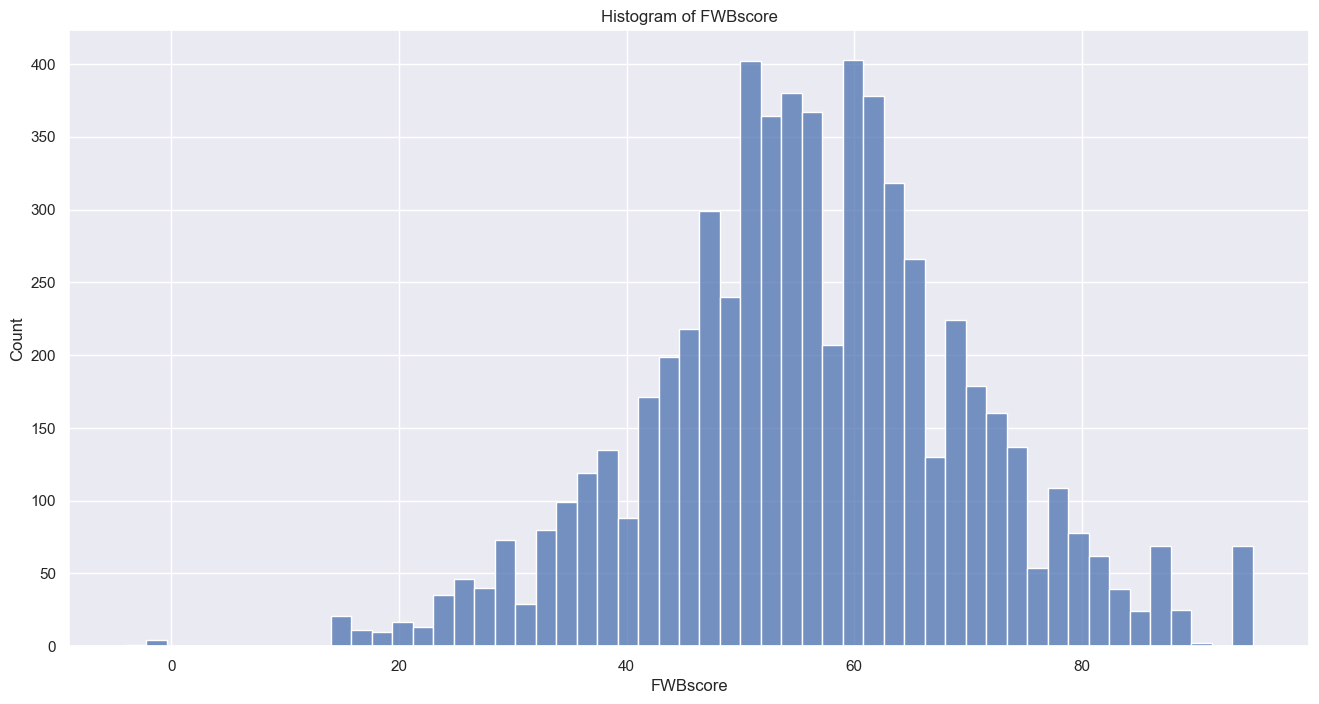

In [12]:
sns.set(rc = {"figure.figsize": (16, 8)})
sns.histplot(x = "FWBscore", data = df).set_title("Histogram of FWBscore")
plt.show()

Check out the unique values of FWBscore and the count of each
- -4: Response not written to database
- -1: Refused
- Range: 14-95

In [13]:
pd.DataFrame(df["FWBscore"].value_counts()).sort_index(ascending = True)

,count
FWBscore,
-4,1
-1,4
14,21
16,3
17,8
18,5
19,5
20,4
21,13


Explore the 10 features (survey questions) used to compute the target variable FWBscore

Plot **histogram** of each feature to explore the distribution
- FWB1 Questions
  - Response value 1: Not at all
  - Response value 2: Very little
  - Response value 3: Somewhat
  - Response value 4: Very well
  - Response value 5: Completely
- FWB2 Questions
  - Response value 1: Never
  - Response value 2: Rarely
  - Response value 3: Sometimes
  - Response value 4: Often
  - Response value 5: Always
- Insights
  - FWB1_4 and FWB2_2 are concentrated towards last 3 responses (somewhat/very well/completely)
    - FWB1_4: I can enjoy life because of the way I'm managing my money
    - FWB2_2: I have money left over at the left of the month
  - FWB1_3, FWB2_1, FWB2_3 and FWB2_4 are concentrated towards first 3 responses (never/rarely/sometimes)
    - FWB1_3: Because of my money situation...I will never have the things I want in life
    - FWB2_1: Giving a gift...would put a strain on my finances for the month
    - FWB2_3: I am behind with my finances
    - FWB2_4: My finances control my life
  - Other features are roughly normally distributed (not much skew)
  - Overall sentiment: Respondents are **quite optimistic** about their own finances (security and freedom of choice for present and future). FWBscore's normal distribution would slightly disagree with the respodnents' optimism.

C:\Users\Apoorva Dhokai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Apoorva Dhokai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Apoorva Dhokai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Apoorva Dhokai\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Conver

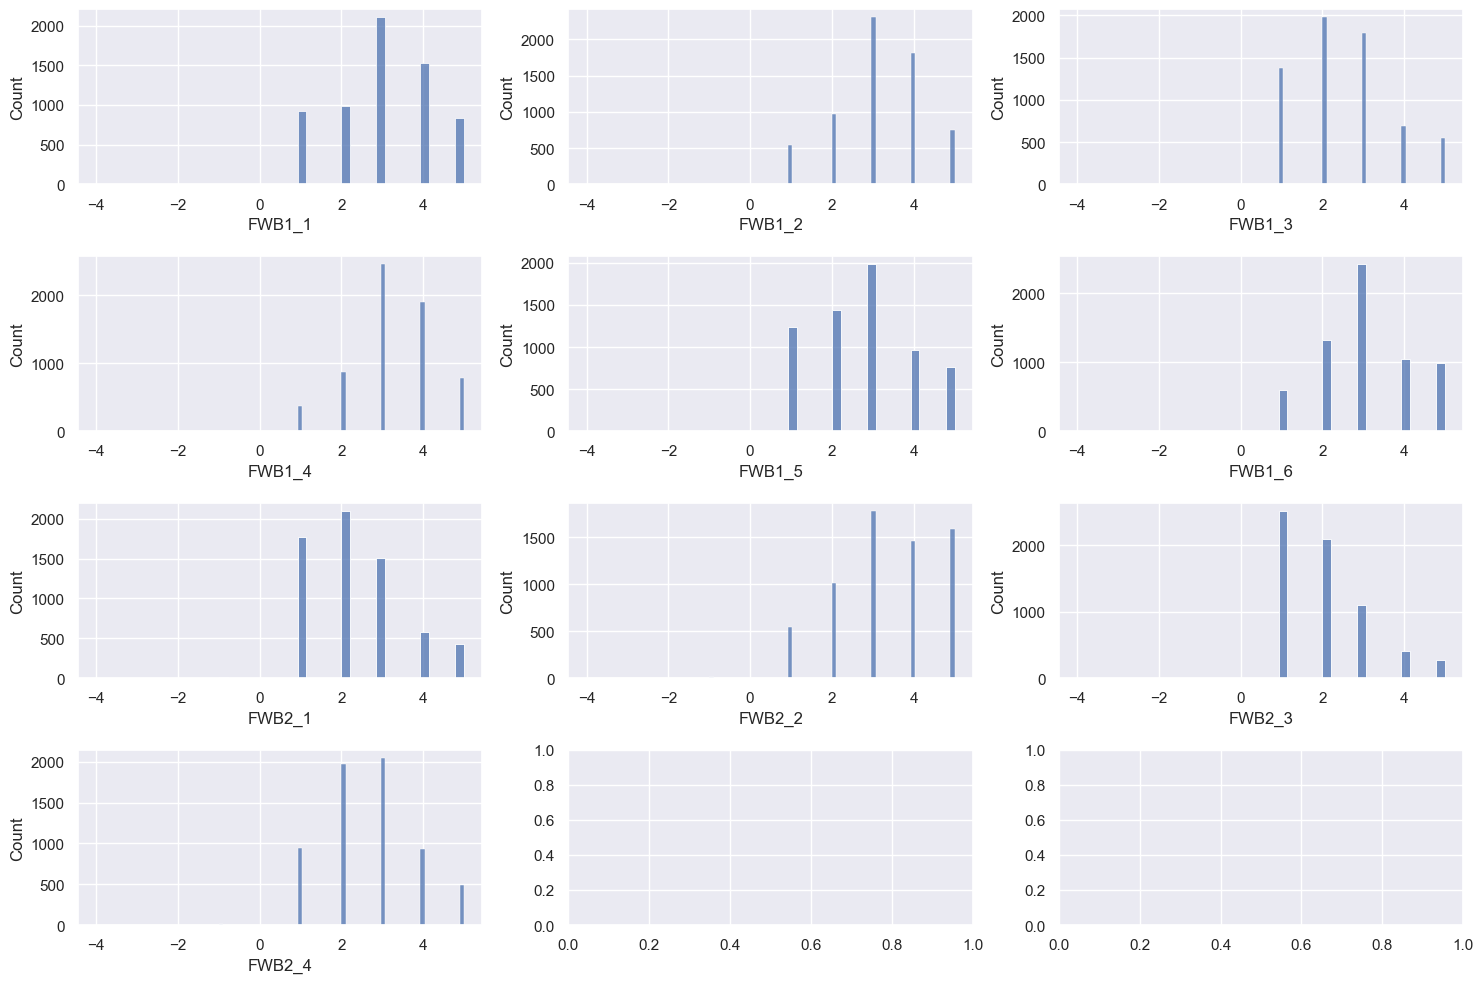

In [14]:
fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize = (15, 10))
for i, column in enumerate(df.columns[7:17]):
    sns.histplot(df[column], ax = axes[i//3, i%3])
    plt.tight_layout()

Correlation Plot
- Range: -1 to 1
- Diagonals are all 1 (correlation with itself)

In [15]:
df.corr()

,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
PUF_ID,1.000000,0.124818,-0.065664,0.011748,-0.000030,-0.014736,0.019490,-0.045636,-0.044122,-0.015157,...,0.001877,0.029953,0.033562,-0.015060,-0.014485,-0.018627,-0.029476,-0.033407,-0.058774,-0.031011
sample,0.124818,1.000000,-0.070477,0.050101,0.034448,-0.026407,0.038394,0.028451,0.022824,-0.026020,...,0.018934,0.039695,0.034220,-0.048821,-0.053497,-0.042421,-0.035854,-0.072701,-0.738932,-0.138575
fpl,-0.065664,-0.070477,1.000000,0.168883,0.086151,0.045559,0.338120,0.298149,0.279650,-0.264586,...,0.058744,-0.034967,-0.042025,-0.063917,-0.119291,-0.142621,-0.114487,-0.057351,0.079624,-0.161899
SWB_1,0.011748,0.050101,0.168883,1.000000,0.612893,0.441516,0.476626,0.417924,0.473874,-0.402826,...,-0.008928,0.030623,0.020751,0.012330,-0.002941,0.007360,0.000615,-0.011221,0.007796,-0.099319
SWB_2,-0.000030,0.034448,0.086151,0.612893,1.000000,0.594910,0.338584,0.299900,0.383364,-0.316754,...,0.005071,0.044083,0.043702,0.038710,0.060286,0.052959,0.037399,0.028815,-0.047419,-0.011639
SWB_3,-0.014736,-0.026407,0.045559,0.441516,0.594910,1.000000,0.194649,0.215725,0.291916,-0.176910,...,0.010540,0.025785,0.025235,0.051114,0.078907,0.067118,0.048177,0.068079,-0.026883,0.052529
FWBscore,0.019490,0.038394,0.338120,0.476626,0.338584,0.194649,1.000000,0.702372,0.663491,-0.767789,...,0.026778,0.027552,0.021479,-0.043873,-0.087550,-0.112541,-0.106436,-0.066649,0.066554,-0.221097
FWB1_1,-0.045636,0.028451,0.298149,0.417924,0.299900,0.215725,0.702372,1.000000,0.681299,-0.479241,...,0.055072,0.043051,0.040217,-0.012262,-0.048067,-0.083985,-0.088980,-0.061405,0.021653,-0.189203
FWB1_2,-0.044122,0.022824,0.279650,0.473874,0.383364,0.291916,0.663491,0.681299,1.000000,-0.478957,...,0.046284,0.009083,0.006624,-0.009024,-0.026792,-0.056036,-0.064060,-0.042486,0.018659,-0.149483
FWB1_3,-0.015157,-0.026020,-0.264586,-0.402826,-0.316754,-0.176910,-0.767789,-0.479241,-0.478957,1.000000,...,-0.026965,-0.017281,-0.007890,0.026271,0.045353,0.057828,0.066266,0.045705,-0.026734,0.145921


Feature correlation to FWBscore sorted in ascending order
- Top 6 negative correlation
  - **FWB2_1:** -0.823960
  - **FWB1_3:** -0.772805
  - **FWB2_4:** -0.735134
  - **FWB2_3:** -0.732852
  - **FWB1_6:** -0.714138
  - **FWB1_5:** -0.654923
- Top 4 positive correlation (excluding FWBscore: self-correlation)
  - **FWB1_2:** 0.685106
  - **FWB1_4:** 0.697323
  - **FWB2_2:** 0.729137
  - **FWB1_1:** 0.733634
- As expected, the top 10 correlation are all the direct questions asked in the Financial Well-Being Survey to compute FWBscore

In [16]:
pd.DataFrame(df.corr()["FWBscore"].sort_values())

,FWBscore
FWB2_1,-0.816481
FWB1_3,-0.767789
FWB2_4,-0.725068
FWB2_3,-0.724550
FWB1_6,-0.696643
FWB1_5,-0.639800
ENDSMEET,-0.621632
MATHARDSHIP_1,-0.473084
MATHARDSHIP_2,-0.441248
DISTRESS,-0.406242


##**Data Preprocessing**

###**Data Cleaning**
![](https://res.cloudinary.com/hevo/image/upload/f_auto,q_auto/v1612420941/hevo-learn/data_cleaning.png)

####**Removal of Missing Values**
- None found

In [17]:
df.isna().sum()

PUF_ID                 0
sample                 0
fpl                    0
SWB_1                  0
SWB_2                  0
SWB_3                  0
FWBscore               0
FWB1_1                 0
FWB1_2                 0
FWB1_3                 0
FWB1_4                 0
FWB1_5                 0
FWB1_6                 0
FWB2_1                 0
FWB2_2                 0
FWB2_3                 0
FWB2_4                 0
FSscore                0
FS1_1                  0
FS1_2                  0
FS1_3                  0
FS1_4                  0
FS1_5                  0
FS1_6                  0
FS1_7                  0
FS2_1                  0
FS2_2                  0
FS2_3                  0
SUBKNOWL1              0
ACT1_1                 0
ACT1_2                 0
FINGOALS               0
PROPPLAN_1             0
PROPPLAN_2             0
PROPPLAN_3             0
PROPPLAN_4             0
MANAGE1_1              0
MANAGE1_2              0
MANAGE1_3              0
MANAGE1_4              0


####**Removal of Duplicates**

Check for duplicated PUF_ID
- None found

In [18]:
df[df["PUF_ID"].duplicated() == True]

,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt


####**Data Type Conversion**
- All columns to be converted to **"category"** data type except:
  - PUF_ID: unique primary key
  - Integer score columns: FWBscore, FSscore, LMscore
  - Float score columns: KHscore, finalwt

In [19]:
list_of_columns_to_be_converted = df.iloc[:, 1:].select_dtypes("int64").columns.to_list() 
list_of_columns_to_be_converted = [i for i in list_of_columns_to_be_converted if "score" not in i]
df.loc[:, list_of_columns_to_be_converted] = df.loc[:, list_of_columns_to_be_converted].astype("category")

In [20]:
df.head()

,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
0,10350,2,3,5,5,6,55,3,3,3,...,1,4,8,0,0,0,0,1,0,0.367292
1,7740,1,3,6,6,6,51,2,2,3,...,1,2,3,0,0,0,0,2,0,1.327561
2,13699,1,3,4,3,4,49,3,3,3,...,1,4,9,0,0,0,1,2,1,0.835156
3,7267,1,3,6,6,6,49,3,3,3,...,1,3,7,0,0,0,0,1,0,1.410871
4,7375,1,3,4,4,4,49,3,3,3,...,1,2,4,0,0,1,0,4,1,4.260668


In [22]:
pd.DataFrame(df.dtypes, columns = ["Data Type"])

,Data Type
PUF_ID,int64
sample,category
fpl,category
SWB_1,category
SWB_2,category
SWB_3,category
FWBscore,int64
FWB1_1,category
FWB1_2,category
FWB1_3,category


####**Removal of Rows with Negative FWBscore**
- 5 rows removed

In [23]:
df = df[df["FWBscore"] >= 0]

In [24]:
print("Number of rows: {}\nNumber of columns: {}".format(df.shape[0], df.shape[1]))

Number of rows: 6389
Number of columns: 217


###**Discretization of the Target Variable**
![](https://miro.medium.com/max/5276/1*LGTAObYYj2-fdBMFLz30rw.jpeg)
- In Singapore, 10-14% of the population struggles with severe financial issues. 
- Using the bottom 14% poverty line as a benchmark, we add a buffer of 6% to make up the **bottom 20th percentile** of population data as our **“At risk”** group. 
- The remaining population will naturally belong to the **“Not at risk”** group requiring minimal financial intervention.


In [25]:
df["FWBscore"] = pd.qcut(df["FWBscore"], [0, 0.2, 1], labels = ["At risk", "Not at risk"])

In [26]:
df.head(50)

,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
0,10350,2,3,5,5,6,Not at risk,3,3,3,...,1,4,8,0,0,0,0,1,0,0.367292
1,7740,1,3,6,6,6,Not at risk,2,2,3,...,1,2,3,0,0,0,0,2,0,1.327561
2,13699,1,3,4,3,4,Not at risk,3,3,3,...,1,4,9,0,0,0,1,2,1,0.835156
3,7267,1,3,6,6,6,Not at risk,3,3,3,...,1,3,7,0,0,0,0,1,0,1.410871
4,7375,1,3,4,4,4,Not at risk,3,3,3,...,1,2,4,0,0,1,0,4,1,4.260668
5,10910,1,3,5,7,5,Not at risk,5,1,1,...,1,2,3,0,0,0,0,2,0,0.760061
6,11079,1,3,5,4,7,Not at risk,1,3,2,...,1,2,4,0,0,1,1,3,0,1.370522
7,7741,1,3,2,2,2,Not at risk,1,2,4,...,1,2,4,0,0,0,0,3,0,1.193365
8,8303,1,3,7,7,7,At risk,4,5,2,...,1,3,7,0,0,0,1,3,0,2.497838
9,9688,1,3,4,5,4,Not at risk,3,3,2,...,1,1,2,0,0,0,0,3,0,1.266602


Check out the distribution of the discretized FWBscore
- Approximately 20% will be "At risk" due to our decision to choose the bottom 20th percentile split

C:\Users\Apoorva Dhokai\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


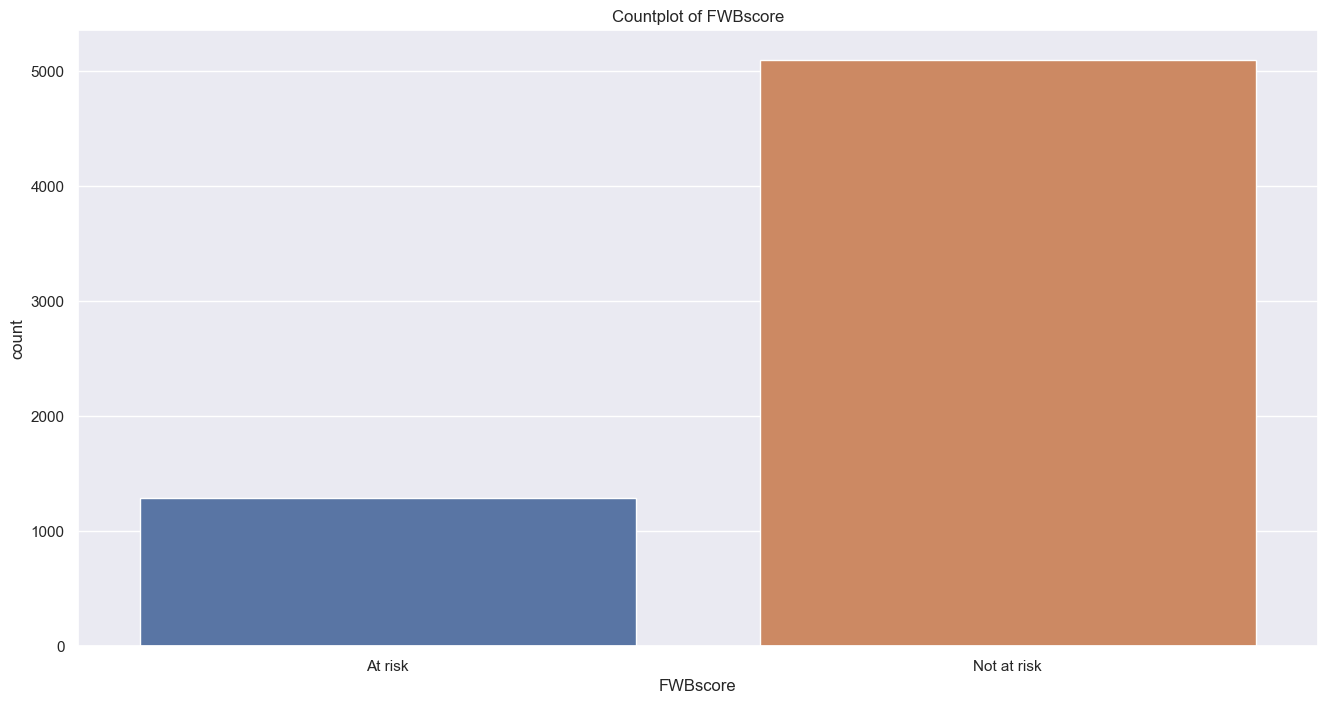

In [27]:
sns.set(rc = {"figure.figsize": (16, 8)})
sns.countplot(x = "FWBscore", data = df).set_title("Countplot of FWBscore")
plt.show()

###**Feature Selection**
![](https://assets.datacamp.com/production/repositories/3515/datasets/d2b96a0003592433ae1e9642387edea11df320b0/selection_colors.png)

- **Cat 1:** Removal of PUF_ID column (all unique values, not useful for machine learning)

- **Cat 2:** Removal of sample and fpl columns (demographic/poverty differences have been accounted for in the final FWBscore)

- **Cat 3:** Removal of Direct Survey Questions for FWBscore
  - FWB1_1, FWB1_2, FWB1_3, FWB1_4, FWB1_5, FWB1_6, FWB2_1, FWB2_2, FWB2_3, FWB2_4

- **Cat 4:** Removal of Secondary Survey Score Columns 
  - Keep only FWBscore as target variable
  - Other survey scores are a result of the related questions asked (correlation)
    - Final features selected might not have full set of questions for each survey score to be an accurate predictor variable
    - FSscore, LMscore, KHscore, finalwt
- **Cat 5:** Removal of Survey Items with Incomplete Base 
  - Base: Who was asked each survey item
  - Retain features where Base = "All" so the questions are applicable to any respondent and not only a subset of those who answered relevant preceding questions
  
- **Cat 6:** Removal of Survey Items with Sensitive, Vague or Region Specific Questions
  - Sensitive Questions
    - HOUSERANGES, IMPUTATION_FLAG, SAVINGSRANGES, agecat, generation, PPEDUC, PPGENDER, PPINCIMP, PPMARIT
  - Vague Question
    - CONNECT
  - Region Specific Questions
    - MILITARY, Military_Status, PPETHM, PPMSACAT, PPREG4, PPREG9

- **Cat 7:** Removal of Survey Items with Specific Financial Knowledge Questions
  - FINKNOWL1, FINKNOWL2, FINKNOWL3, FK1correct, FK2correct, FK3correct, KHKNOWL1, KHKNOWL2, KHKNOWL3, KHKNOWL4, KHKNOWL5, KHKNOWL6, KHKNOWL7, KHKNOWL8, KHKNOWL9, KH1correct, KH2correct, KH3correct, KH4correct, KH5correct, KH6correct, KH7correct, KH8correct, KH9correct











In [28]:
df.drop([# Cat 1
         "PUF_ID",

         # Cat 2
         "sample", "fpl", 

         # Cat 3
         "FWB1_1", "FWB1_2", "FWB1_3", "FWB1_4", "FWB1_5", "FWB1_6",
         "FWB2_1", "FWB2_2", "FWB2_3", "FWB2_4",

         # Cat 4
         "FSscore", "LMscore", "KHscore", "finalwt",

         # Cat 5
         "VALUERANGES", "MORTGAGE", "PAIDHELP", "SOCSEC1", "SOCSEC2", "SOCSEC3", 
         "LIFEEXPECT", "RETIRE", "PCTLT200FPL",

         # Cat 6
         "HOUSERANGES", "IMPUTATION_FLAG", "SAVINGSRANGES", "agecat", "generation", "PPEDUC", "PPGENDER", "PPINCIMP", "PPMARIT",
         "CONNECT",
         "MILITARY", "Military_Status", "PPETHM", "PPMSACAT", "PPREG4", "PPREG9",

         # Cat 7
         "FINKNOWL1", "FINKNOWL2", "FINKNOWL3", "FK1correct", "FK2correct", "FK3correct",
         "KHKNOWL1", "KHKNOWL2", "KHKNOWL3", "KHKNOWL4", "KHKNOWL5", "KHKNOWL6", "KHKNOWL7", "KHKNOWL8", "KHKNOWL9",
         "KH1correct", "KH2correct", "KH3correct", "KH4correct", "KH5correct", "KH6correct", "KH7correct", "KH8correct", "KH9correct"], 
        inplace = True, 
        axis = 1)

In [29]:
df.head()

,SWB_1,SWB_2,SWB_3,FWBscore,FS1_1,FS1_2,FS1_3,FS1_4,FS1_5,FS1_6,...,EMPLOY1_6,EMPLOY1_7,EMPLOY1_8,EMPLOY1_9,PPHHSIZE,PPT01,PPT25,PPT612,PPT1317,PPT18OV
0,5,5,6,Not at risk,3,3,4,3,3,3,...,0,0,1,0,1,0,0,0,0,1
1,6,6,6,Not at risk,3,3,3,3,4,3,...,0,0,0,0,2,0,0,0,0,2
2,4,3,4,Not at risk,3,3,3,3,3,3,...,0,0,0,0,3,0,0,0,1,2
3,6,6,6,Not at risk,3,3,3,3,3,3,...,0,0,0,1,1,0,0,0,0,1
4,4,4,4,Not at risk,3,3,3,3,3,3,...,0,0,0,0,5,0,0,1,0,4


Dimensions after feature selection

In [30]:
print("Number of rows: {}\nNumber of columns: {}".format(df.shape[0], df.shape[1]))

Number of rows: 6389
Number of columns: 151


#**Model Development and Evaluation**

![](http://storage.ning.com/topology/rest/1.0/file/get/2808372468?profile=original)

##**Model Development and Evaluation**

Import libraries required for model development and evaluation

In [31]:
# A set of scikit-learn-style transformers for encoding categorical variables into numeric with different techniques
!pip install category_encoders

In [34]:
!pip install scikeras
!pip install xgboost
!pip install -U scikit-learn

import category_encoders as ce
import tensorflow as tf
import xgboost as xgb
from keras.layers import Dense, Dropout
from keras.models import Sequential
from scikeras.wrappers import KerasClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.naive_bayes import BernoulliNB
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import column_or_1d

###**Data Partioning**
![](https://www.mltut.com/wp-content/uploads/2020/05/k-fold-cross-validation.png)
- Prepare X and y data sets
- Binary encode X features
- Label encode y label
  - 0: Not at risk
  - 1: At risk
- Perform train-test split 

In [35]:
# This is to allow 1 to be the class of interest (At risk)
class MyLabelEncoder(LabelEncoder):
    """Override the fit() function to prevent sorting."""

    def fit(self, y):
        y = column_or_1d(y, warn = True)
        self.classes_ = pd.Series(y).unique()
        return self

In [36]:
# Predictor variables (drop "FWBscore")
X = df.iloc[:, np.r_[0:3, 4:len(df.columns)]]
# Binary encode all the X features
binary_encoder = ce.BinaryEncoder(X)
X = binary_encoder.fit_transform(X)

# Define and encode label
label_encoder = MyLabelEncoder()
y = df.iloc[:, 3]
label_encoder.fit(['Not at risk', 'At risk' ])
y = label_encoder.transform(y)

Dimensions of X data set after binary encoding

In [37]:
print("Number of rows: {}\nNumber of columns: {}".format(X.shape[0], X.shape[1]))

Number of rows: 6389
Number of columns: 384


In [38]:
X.head()

,SWB_1_0,SWB_1_1,SWB_1_2,SWB_1_3,SWB_2_0,SWB_2_1,SWB_2_2,SWB_2_3,SWB_3_0,SWB_3_1,...,PPT01_1,PPT25_0,PPT25_1,PPT612_0,PPT612_1,PPT1317_0,PPT1317_1,PPT18OV_0,PPT18OV_1,PPT18OV_2
0,0,0,0,1,0,0,0,1,0,0,...,1,0,1,0,1,0,1,0,0,1
1,0,0,1,0,0,0,1,0,0,0,...,1,0,1,0,1,0,1,0,1,0
2,0,0,1,1,0,0,1,1,0,0,...,1,0,1,0,1,1,0,0,1,0
3,0,0,1,0,0,0,1,0,0,0,...,1,0,1,0,1,0,1,0,0,1
4,0,0,1,1,0,1,0,0,0,0,...,1,0,1,1,0,0,1,0,1,1


Check the number of unique values in each x feature
- Should be **either 1 or 2** (since values can only take on either 0 or 1)
- If only 1 unique value means that particular bit was either completely "turned on" or "turned off by all rows simultaneously
- Remove all binary columns with only 1 unique value (no value for machine learning)

In [39]:
X.nunique()

SWB_1_0                  2
SWB_1_1                  2
SWB_1_2                  2
SWB_1_3                  2
SWB_2_0                  2
SWB_2_1                  2
SWB_2_2                  2
SWB_2_3                  2
SWB_3_0                  2
SWB_3_1                  2
SWB_3_2                  2
SWB_3_3                  2
FS1_1_0                  2
FS1_1_1                  2
FS1_1_2                  2
FS1_2_0                  2
FS1_2_1                  2
FS1_2_2                  2
FS1_3_0                  2
FS1_3_1                  2
FS1_3_2                  2
FS1_4_0                  2
FS1_4_1                  2
FS1_4_2                  2
FS1_5_0                  2
FS1_5_1                  2
FS1_5_2                  2
FS1_6_0                  2
FS1_6_1                  2
FS1_6_2                  2
FS1_7_0                  2
FS1_7_1                  2
FS1_7_2                  2
FS2_1_0                  2
FS2_1_1                  2
FS2_1_2                  2
FS2_2_0                  2
F

Remove all columns with only 1 unique value

In [40]:
for col in X.columns:
  if len(X[col].unique()) == 1:
    X.drop(col, inplace = True, axis = 1)

Examine that all columns have 2 unique values

In [41]:
X.nunique()

SWB_1_0                  2
SWB_1_1                  2
SWB_1_2                  2
SWB_1_3                  2
SWB_2_0                  2
SWB_2_1                  2
SWB_2_2                  2
SWB_2_3                  2
SWB_3_0                  2
SWB_3_1                  2
SWB_3_2                  2
SWB_3_3                  2
FS1_1_0                  2
FS1_1_1                  2
FS1_1_2                  2
FS1_2_0                  2
FS1_2_1                  2
FS1_2_2                  2
FS1_3_0                  2
FS1_3_1                  2
FS1_3_2                  2
FS1_4_0                  2
FS1_4_1                  2
FS1_4_2                  2
FS1_5_0                  2
FS1_5_1                  2
FS1_5_2                  2
FS1_6_0                  2
FS1_6_1                  2
FS1_6_2                  2
FS1_7_0                  2
FS1_7_1                  2
FS1_7_2                  2
FS2_1_0                  2
FS2_1_1                  2
FS2_1_2                  2
FS2_2_0                  2
F

Dimensions of X data set after removing columns with only 1 unique value
- 69 columns have been removed

In [42]:
print("Number of rows: {}\nNumber of columns: {}".format(X.shape[0], X.shape[1]))

Number of rows: 6389
Number of columns: 384


Perform train-test split
- **70:30** ratio

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify = y, random_state = 0)

In [44]:
start = "\033[1m"
end = "\033[0;0m"

In [45]:
print("{}X Training Data{}\n-----------------------\nNumber of rows: {}\nNumber of columns: {}\n".format(start, end, X_train.shape[0], X_train.shape[1]))
print("{}X Testing Data{}\n-----------------------\nNumber of rows: {}\nNumber of columns: {}\n".format(start, end, X_test.shape[0], X_test.shape[1]))
print("{}y Training Data{}\n-----------------------\nNumber of rows: {}\n".format(start, end, y_train.shape[0]))
print("{}y Testing Data{}\n-----------------------\nNumber of rows: {}\n".format(start, end, y_test.shape[0]))

X Training Data
-----------------------
Number of rows: 4472
Number of columns: 384

X Testing Data
-----------------------
Number of rows: 1917
Number of columns: 384

y Training Data
-----------------------
Number of rows: 4472

y Testing Data
-----------------------
Number of rows: 1917



Check **y data distribution** for both training and testing data

In [46]:
print("y Training Data Distribution: ", np.unique(y_train, return_counts = True))
print("y Testing Data Distribution: ", np.unique(y_test, return_counts = True))

y Training Data Distribution:  (array([0, 1]), array([3570,  902], dtype=int64))
y Testing Data Distribution:  (array([0, 1]), array([1530,  387], dtype=int64))


Positive label proportion should be around **0.2** for both training and testing data

In [47]:
print("y Training Data Positive Label: ", round(np.unique(y_train, return_counts = True)[1][1] / (np.unique(y_train, return_counts = True)[1][0] + np.unique(y_train, return_counts = True)[1][1]), 4))
print("y Testing Data Positive Label: ", round(np.unique(y_test, return_counts = True)[1][1] / (np.unique(y_test, return_counts = True)[1][0] + np.unique(y_test, return_counts = True)[1][1]), 4))

y Training Data Positive Label:  0.2017
y Testing Data Positive Label:  0.2019


###**Model 1: Logistic Regression**
![](https://codesachin.files.wordpress.com/2015/08/linearly_separable_4.png)

Define hyperparameter grid
- C : float, default=1.0
  - Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

In [72]:
parameters_lr = {
    'C': [100, 10, 1.0, 0.1, 0.01],
    'class_weight': [None, 'balanced']
    }

Define model and cross-validated grid search

In [73]:
lr = LogisticRegression(max_iter = 100000, random_state = 42)
lr_clf = GridSearchCV(estimator = lr, 
                      param_grid = parameters_lr,
                      scoring = 'f1_macro', 
                      n_jobs = -1,
                      cv = 3)

Fit the model
- Use **grid search** for logistic regression since it has only 1 important hyperparameter to tune
- We will use **random search** for models which have a lot of hyperparameters

In [74]:
lr_clf.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=100000, random_state=42),
             n_jobs=-1,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'class_weight': [None, 'balanced']},
             scoring='f1_macro')

Obtain the best hyperparameters

In [75]:
lr_clf.best_params_

{'C': 0.1, 'class_weight': None}

Predict new data using the trained model

In [76]:
y_pred_lr = lr_clf.predict(X_test)

Classification Report
- Precision (0): Proportion of correctly predicted "Not at risk" population to the total predicted "Not at risk" population
- Recall (0): Proportion of total "Not at risk" population found
- Precision (1): Proportion of correctly predicted "At risk" population to the total predicted "At risk" population
- Recall (1): Proportion of total "At risk" population found
- Accuracy: Proportion of correctly predicted "At risk" and "Not at risk" population among total population

In [77]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1530
           1       0.75      0.63      0.69       387

    accuracy                           0.88      1917
   macro avg       0.83      0.79      0.81      1917
weighted avg       0.88      0.88      0.88      1917



Summary of Key Performance Metrics

In [78]:
print("Accuracy: {}".format(round(accuracy_score(y_test, y_pred_lr), 4)))
print("Precision: {}".format(round(precision_score(y_test, y_pred_lr), 4)))
print("Recall: {}".format(round(recall_score(y_test, y_pred_lr), 4)))
print("F1_score: {}".format(round(f1_score(y_test, y_pred_lr), 4)))

Accuracy: 0.8832
Precision: 0.7508
Recall: 0.6305
F1_score: 0.6854


Confusion Matrix

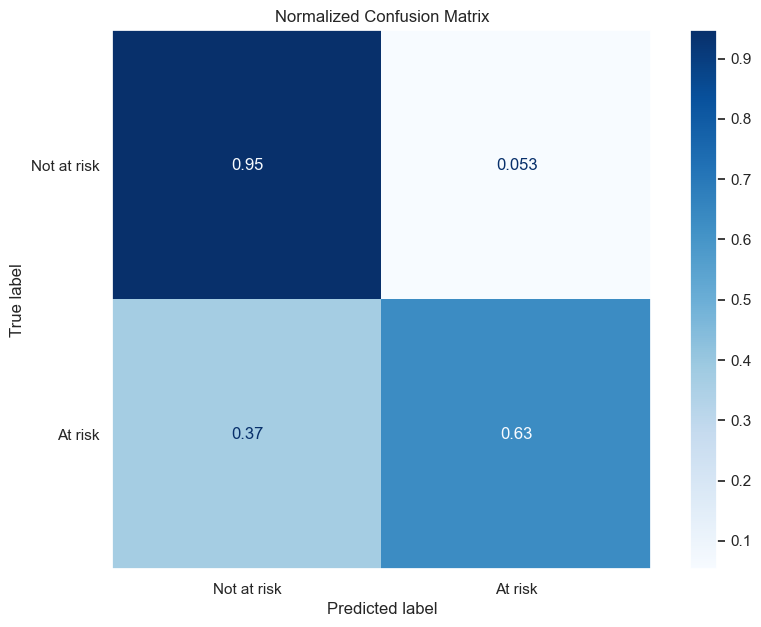

In [83]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_lr, normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Not at risk', 'At risk'])
fig, ax = plt.subplots(figsize=(10,7))
disp.plot(ax=ax , cmap = 'Blues')
plt.title("Normalized Confusion Matrix")
plt.grid(False)
plt.show()

###**Model 2: Decision Tree Classifier**
![](https://www.icmi.com/-/media/Images/Resources/Articles/2019/decision-trees.ashx?h=233&w=300&la=en&hash=D63C8F4BD9A936148EFD102E5DECB2535087A998)

Define hyperparameter grid
- criterion : {“gini”, “entropy”}, default=”gini”
  - The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

- max_depth : int, default=None
  - The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

- min_samples_split : int or float, default=2
  - The minimum number of samples required to split an internal node:
  - If int, then consider min_samples_split as the minimum number.
  - If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

- min_samples_leaf : int or float, default=1
  - The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
  - If int, then consider min_samples_leaf as the minimum number.
  - If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

- max_features : int, float or {“auto”, “sqrt”, “log2”}, default=None
  - The number of features to consider when looking for the best split:
  - If int, then consider max_features features at each split.
  - If float, then max_features is a fraction and int(max_features * n_features) features are considered at each split.
  - If “auto”, then max_features=sqrt(n_features).
  - If “sqrt”, then max_features=sqrt(n_features).
  - If “log2”, then max_features=log2(n_features).
  - If None, then max_features=n_features.
  - Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.

- min_impurity_decrease : float, default=0.0
  - A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

- class_weight : dict, list of dict or “balanced”, default=None
  - Weights associated with classes in the form {class_label: weight}. If None, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.
  - The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))
  - Note that these weights will be multiplied with sample_weight (passed through the fit method) if sample_weight is specified.

In [87]:
parameters_dt = {
    'criterion': ['entropy', 'gini'],
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], 
    'min_samples_split': [2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'min_samples_leaf': [1, 2, 3, 4, 5, 10, 20, 30, 40, 50],
    'max_features': ['log2', 'sqrt', 'auto'],
    'min_impurity_decrease': [0.00005, 0.0001, 0.0002, 0.0005, 0.001, 0.0015, 0.002, 0.005, 0.01],
    'class_weight': [None, 'balanced']
    }

Define model and cross-validated randomized search

In [88]:
dt = DecisionTreeClassifier(random_state = 42)
dt_clf = RandomizedSearchCV(estimator = dt, 
                            param_distributions = parameters_dt, 
                            n_iter = 100,
                            scoring = 'f1_macro',
                            n_jobs = -1,
                            cv = 3)

Fit the model

In [89]:
dt_clf.fit(X_train, y_train)

C:\Users\Apoorva Dhokai\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
114 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Apoorva Dhokai\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Apoorva Dhokai\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Apoorva Dhokai\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Us

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15],
                                        'max_features': ['log2', 'sqrt',
                                                         'auto'],
                                        'min_impurity_decrease': [5e-05, 0.0001,
                                                                  0.0002,
                                                                  0.0005, 0.001,
                                                                  0.0015, 0.002,
                                                                  0.005, 0.01],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 10,
                                                             20, 30, 40, 50],
                                        'min_samples_split': [2, 3, 4, 5, 10,
                                                              20, 30, 40, 50,
                                                              60, 70, 80, 90,
                                                              100]},
                   scoring='f1_macro')

Obtain the best hyperparameters

In [90]:
dt_clf.best_params_

{'min_samples_split': 3,
 'min_samples_leaf': 40,
 'min_impurity_decrease': 0.001,
 'max_features': 'sqrt',
 'max_depth': 9,
 'criterion': 'entropy',
 'class_weight': None}

Predict new data using the trained model

In [91]:
y_pred_dt = dt_clf.predict(X_test)

Classification Report
- Precision (0): Proportion of correctly predicted "Not at risk" population to the total predicted "Not at risk" population
- Recall (0): Proportion of total "Not at risk" population found
- Precision (1): Proportion of correctly predicted "At risk" population to the total predicted "At risk" population
- Recall (1): Proportion of total "At risk" population found
- Accuracy: Proportion of correctly predicted "At risk" and "Not at risk" population among total population

In [92]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      1530
           1       0.65      0.60      0.63       387

    accuracy                           0.85      1917
   macro avg       0.78      0.76      0.77      1917
weighted avg       0.85      0.85      0.85      1917



Summary of Key Performance Metrics

In [93]:
print("Accuracy: {}".format(round(accuracy_score(y_test, y_pred_dt), 4)))
print("Precision: {}".format(round(precision_score(y_test, y_pred_dt), 4)))
print("Recall: {}".format(round(recall_score(y_test, y_pred_dt), 4)))
print("F1_score: {}".format(round(f1_score(y_test, y_pred_dt), 4)))

Accuracy: 0.8545
Precision: 0.6508
Recall: 0.6021
F1_score: 0.6255


Confusion Matrix

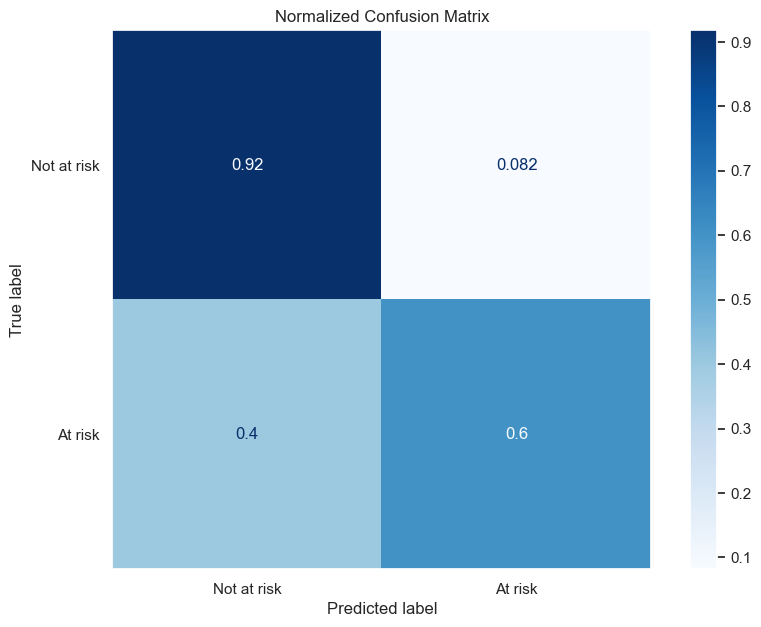

In [96]:
cm = confusion_matrix(y_test, y_pred_dt, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = ['Not at risk', 'At risk'])
fig, ax = plt.subplots(figsize=(10,7))
disp.plot(ax=ax, cmap='Blues')
plt.title("Normalized Confusion Matrix")
plt.grid(False)
plt.show()

###**Model 3: Random Forest Classifier**
![](https://static.javatpoint.com/tutorial/machine-learning/images/random-forest-algorithm.png)

Define hyperparameter grid
- n_estimators : int, default=100
  - The number of trees in the forest.

- criterion : {“gini”, “entropy”}, default=”gini”
  - The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Note: this parameter is tree-specific.

- max_depth : int, default=None
  - The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

- min_samples_split : int or float, default=2
  - The minimum number of samples required to split an internal node:
  - If int, then consider min_samples_split as the minimum number.
  - If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

- min_samples_leaf : int or float, default=1
  - The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
  - If int, then consider min_samples_leaf as the minimum number.
  - If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

- max_features : {“auto”, “sqrt”, “log2”}, int or float, default=”auto”
  - The number of features to consider when looking for the best split:
  - If int, then consider max_features features at each split.
  - If float, then max_features is a fraction and round(max_features * n_features) features are considered at each split.
  - If “auto”, then max_features=sqrt(n_features).
  - If “sqrt”, then max_features=sqrt(n_features) (same as “auto”).
  - If “log2”, then max_features=log2(n_features).
  - If None, then max_features=n_features.
  - Note: the search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.

- min_impurity_decrease : float, default=0.0
  - A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

- class_weight : {“balanced”, “balanced_subsample”}, dict or list of dicts, default=None
  - Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one. 
  - The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))
  - The “balanced_subsample” mode is the same as “balanced” except that weights are computed based on the bootstrap sample for every tree grown.
  - Note that these weights will be multiplied with sample_weight (passed through the fit method) if sample_weight is specified.

In [97]:
parameters_rf = {
    'n_estimators': [10, 20, 30, 40, 50, 100, 150, 200, 300],
    'criterion': ['entropy', 'gini'], 
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'min_samples_split': [2, 3, 4, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'min_samples_leaf': [1, 2, 3, 4, 5, 10, 20, 30, 40, 50],
    'max_features': ['log2', 'sqrt','auto'],
    'min_impurity_decrease': [0.00005, 0.0001, 0.0002, 0.0005, 0.001, 0.0015, 0.002, 0.005, 0.01],
    'class_weight': [None, 'balanced']
    }

Define model and cross-validated randomized search

In [98]:
rf = RandomForestClassifier(random_state = 42)
rf_clf = RandomizedSearchCV(estimator = rf, 
                            param_distributions = parameters_rf, 
                            n_iter = 100,
                            scoring = 'f1_macro',
                            n_jobs = -1,
                            cv = 3)

Fit the model

In [99]:
rf_clf.fit(X_train, y_train)

C:\Users\Apoorva Dhokai\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
72 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
62 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Apoorva Dhokai\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Apoorva Dhokai\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Apoorva Dhokai\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Use

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'criterion': ['entropy', 'gini'],
                                        'max_depth': [2, 3, 4, 5, 6, 7, 8, 9,
                                                      10, 11, 12, 13, 14, 15],
                                        'max_features': ['log2', 'sqrt',
                                                         'auto'],
                                        'min_impurity_decrease': [5e-05, 0.0001,
                                                                  0.0002,
                                                                  0.0005, 0.001,
                                                                  0.0015, 0.002,
                                                                  0.005, 0.01],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 10,
                                                             20, 30, 40, 50],
                                        'min_samples_split': [2, 3, 4, 5, 10,
                                                              20, 30, 40, 50,
                                                              60, 70, 80, 90,
                                                              100],
                                        'n_estimators': [10, 20, 30, 40, 50,
                                                         100, 150, 200, 300]},
                   scoring='f1_macro')

Obtain the best hyperparameters

In [100]:
rf_clf.best_params_

{'n_estimators': 300,
 'min_samples_split': 20,
 'min_samples_leaf': 5,
 'min_impurity_decrease': 0.0002,
 'max_features': 'sqrt',
 'max_depth': 14,
 'criterion': 'gini',
 'class_weight': 'balanced'}

Predict new data using the trained model

In [101]:
y_pred_rf = rf_clf.predict(X_test)

Classification Report
- Precision (0): Proportion of correctly predicted "Not at risk" population to the total predicted "Not at risk" population
- Recall (0): Proportion of total "Not at risk" population found
- Precision (1): Proportion of correctly predicted "At risk" population to the total predicted "At risk" population
- Recall (1): Proportion of total "At risk" population found
- Accuracy: Proportion of correctly predicted "At risk" and "Not at risk" population among total population

In [102]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.86      0.91      1530
           1       0.61      0.84      0.71       387

    accuracy                           0.86      1917
   macro avg       0.78      0.85      0.81      1917
weighted avg       0.89      0.86      0.87      1917



Summary of Key Performance Metrics

In [103]:
print("Accuracy: {}".format(round(accuracy_score(y_test, y_pred_rf), 4)))
print("Precision: {}".format(round(precision_score(y_test, y_pred_rf), 4)))
print("Recall: {}".format(round(recall_score(y_test, y_pred_rf), 4)))
print("F1_score: {}".format(round(f1_score(y_test, y_pred_rf), 4)))

Accuracy: 0.8597
Precision: 0.6109
Recall: 0.8398
F1_score: 0.7073


Confusion Matrix

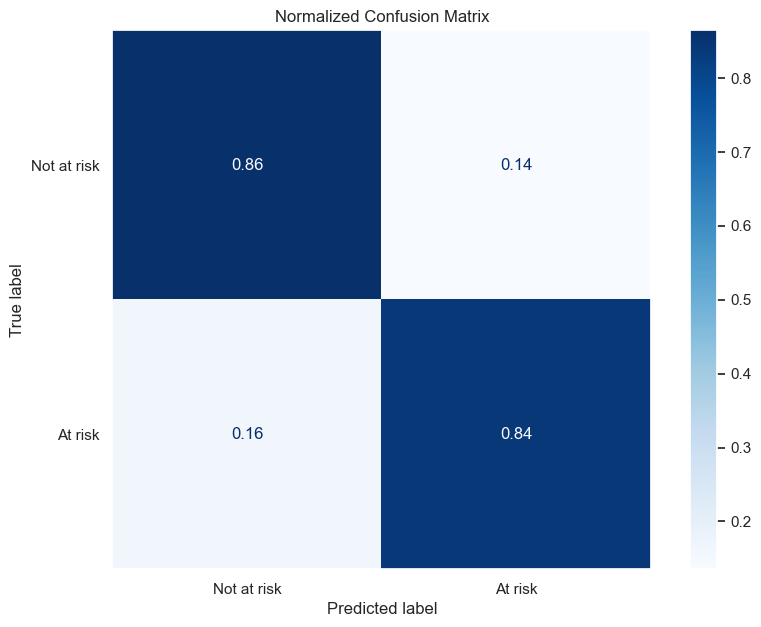

In [106]:
cm=confusion_matrix(y_test, y_pred_rf, normalize='true')
disp=ConfusionMatrixDisplay(confusion_matrix=cm,display_labels = ['Not at risk', 'At risk'])
fig, ax = plt.subplots(figsize=(10,7))
disp.plot(ax=ax, cmap='Blues')
plt.title("Normalized Confusion Matrix")
plt.grid(False)
plt.show()

###**Model 4: XGBoost Classifier**
![](https://i.imgur.com/e7MIgXk.png)

Define hyperparameter grid
- max_depth (int) – Maximum tree depth for base learners.
- learning_rate (float) – Boosting learning rate (xgb’s “eta”)
- n_estimators (int) – Number of boosting rounds.
- booster (string) – Specify which booster to use: gbtree, gblinear or dart.
- gamma (float) – Minimum loss reduction required to make a further partition on a leaf node of the tree.
- min_child_weight (float) – Minimum sum of instance weight(hessian) needed in a child.
- subsample (float) – Subsample ratio of the training instance.
- colsample_bytree (float) – Subsample ratio of columns when constructing each tree.
- colsample_bylevel (float) – Subsample ratio of columns for each level.
- colsample_bynode (float) – Subsample ratio of columns for each split.
- reg_alpha (float (xgb's alpha)) – L1 regularization term on weights
- reg_lambda (float (xgb's lambda)) – L2 regularization term on weights
- scale_pos_weight (float) – Balancing of positive and negative weights.

In [130]:
parameters_xgb = {
    'max_depth': [2, 3, 4, 5],
    'learning_rate': [0.001, 0.01, 0.1],
    'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000],
    'subsample': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    }

Define model and cross-validated randomized search

In [131]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
grid_size = np.prod([len(parameters_xgb[key]) for key in parameters_xgb])
xgb_clf = RandomizedSearchCV(xgb_model, 
                             param_distributions = parameters_xgb, 
                             n_iter = min(20, grid_size),
                             verbose=1,
                             n_jobs = -1,
                             cv = 3,
                             random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Fit the model

In [132]:
xgb_clf.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.1, 0.2, 0.3, 0.4,
                                                             0.5, 0.6, 0.7, 0.8,
                                                             0.9, 1.0],
                                        'learning_rate': [0.001, 0.01, 0.1],
                                        'max_depth': [2, 3, 4, 5],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000],
                                        'subsample': [0.1, 0.2, 0.3, 0.4, 0.5,
                                                      0.6, 0.7, 0.8, 0.9,
                                                      1.0]},
                   random_state=42, verbose=1)

Obtain the best hyperparameters

In [133]:
xgb_clf.best_params_

{'subsample': 0.6,
 'n_estimators': 900,
 'max_depth': 2,
 'learning_rate': 0.01,
 'colsample_bytree': 0.2}

Predict new data using the trained model

In [134]:
y_pred_xgb = xgb_clf.predict(X_test)

Classification Report
- Precision (0): Proportion of correctly predicted "Not at risk" population to the total predicted "Not at risk" population
- Recall (0): Proportion of total "Not at risk" population found
- Precision (1): Proportion of correctly predicted "At risk" population to the total predicted "At risk" population
- Recall (1): Proportion of total "At risk" population found
- Accuracy: Proportion of correctly predicted "At risk" and "Not at risk" population among total population

In [135]:
print(classification_report(y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1010
           1       0.76      0.62      0.69       268

    accuracy                           0.88      1278
   macro avg       0.83      0.79      0.81      1278
weighted avg       0.87      0.88      0.88      1278



Summary of Key Performance Metrics

In [136]:
print("Accuracy: {}".format(round(accuracy_score(y_test, y_pred_xgb), 4)))
print("Precision: {}".format(round(precision_score(y_test, y_pred_xgb), 4)))
print("Recall: {}".format(round(recall_score(y_test, y_pred_xgb), 4)))
print("F1_score: {}".format(round(f1_score(y_test, y_pred_xgb), 4)))

Accuracy: 0.8803
Precision: 0.7626
Recall: 0.6231
F1_score: 0.6858


Confusion Matrix

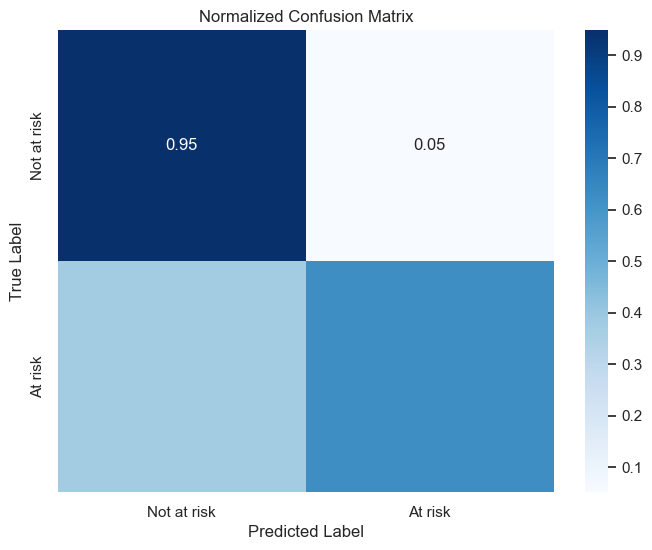

In [139]:
conf_matrix = confusion_matrix(y_test, y_pred_xgb, normalize = 'true')
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='.2f', cmap='Blues', xticklabels=['Not at risk', 'At risk'], yticklabels=['Not at risk','At risk'])
plt.title("Normalized Confusion Matrix")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

###**Model 5: Support Vector Classifier**
![](https://cdn-images-1.medium.com/max/800/1*cxO8_UNsAdOQpanLFJLoRw.png)

Define hyperparameter grid
- C : float, default=1.0
  - Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

- kernel : {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}, default=’rbf’
  - Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable. If none is given, ‘rbf’ will be used. If a callable is given it is used to pre-compute the kernel matrix from data matrices; that matrix should be an array of shape (n_samples, n_samples).

- gamma : {‘scale’, ‘auto’} or float, default=’scale’
  - Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
    - if gamma='scale' (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,
    - if ‘auto’, uses 1 / n_features.

- class_weight : dict or ‘balanced’, default=None
  - Set the parameter C of class i to class_weight[i]*C for SVC. If not given, all classes are supposed to have weight one. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))

In [140]:
parameters_svc = {
    'C': [0.1, 1, 10, 100, 1000],  
    'kernel': ['rbf'],
    'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001, 'scale', 'auto'],
    'class_weight': ['None', 'balanced']
    }

Define model and cross-validated grid search

In [141]:
svc = SVC(random_state = 42)
svc_clf = GridSearchCV(estimator = svc, 
                       param_grid = parameters_svc, 
                       scoring = 'f1_macro',
                       n_jobs = -1,
                       cv = 3)

Fit the model

In [142]:
svc_clf.fit(X_train, y_train)

C:\Users\Apoorva Dhokai\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
120 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Apoorva Dhokai\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Apoorva Dhokai\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Apoorva Dhokai\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\U

GridSearchCV(cv=3, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'class_weight': ['None', 'balanced'],
                         'gamma': [10, 1, 0.1, 0.01, 0.001, 0.0001, 'scale',
                                   'auto'],
                         'kernel': ['rbf']},
             scoring='f1_macro')

Obtain the best hyperparameters

In [143]:
svc_clf.best_params_

{'C': 10, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'rbf'}

Predict new data using the trained model

In [144]:
y_pred_svc = svc_clf.predict(X_test)

Classification Report
- Precision (0): Proportion of correctly predicted "Not at risk" population to the total predicted "Not at risk" population
- Recall (0): Proportion of total "Not at risk" population found
- Precision (1): Proportion of correctly predicted "At risk" population to the total predicted "At risk" population
- Recall (1): Proportion of total "At risk" population found
- Accuracy: Proportion of correctly predicted "At risk" and "Not at risk" population among total population

In [145]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.93      0.87      0.90      1010
           1       0.61      0.76      0.68       268

    accuracy                           0.85      1278
   macro avg       0.77      0.82      0.79      1278
weighted avg       0.87      0.85      0.85      1278



Summary of Key Performance Metrics

In [146]:
print("Accuracy: {}".format(round(accuracy_score(y_test, y_pred_svc), 4)))
print("Precision: {}".format(round(precision_score(y_test, y_pred_svc), 4)))
print("Recall: {}".format(round(recall_score(y_test, y_pred_svc), 4)))
print("F1_score: {}".format(round(f1_score(y_test, y_pred_svc), 4)))

Accuracy: 0.8482
Precision: 0.6101
Recall: 0.7649
F1_score: 0.6788


Confusion Matrix

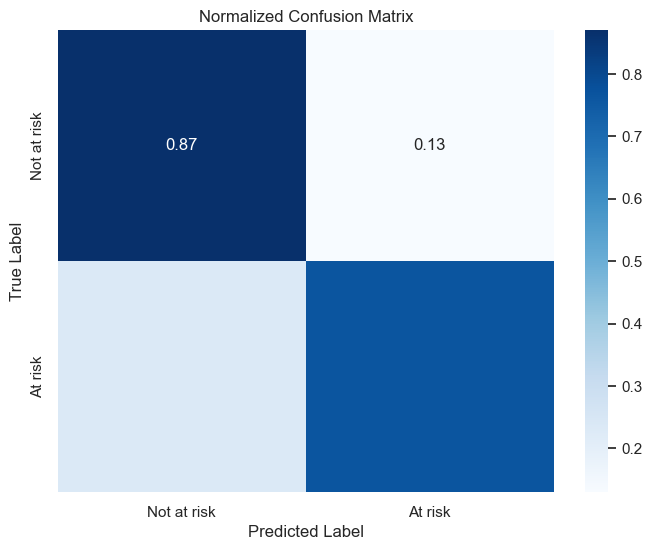

In [149]:
conf_matrix = confusion_matrix(y_test, y_pred_svc, normalize='true')

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='.2f', cmap='Blues', xticklabels=['Not at risk', 'At risk'], yticklabels=['Not at risk', 'At risk'])
plt.title("Normalized Confusion Matrix")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.grid(False)
plt.show()

###**Model 6: Bernoulli Naive Bayes Classifier**
![](https://jakevdp.github.io/PythonDataScienceHandbook/figures/05.05-gaussian-NB.png)

Define hyperparameter grid
- alpha : float, default=1.0
  - Additive (Laplace/Lidstone) smoothing parameter (0 for no smoothing).

In [150]:
parameters_nb = {
    'alpha': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    }

Define model and cross-validated grid search

In [151]:
nb = BernoulliNB()
nb_clf = GridSearchCV(estimator = nb, 
                      param_grid = parameters_nb, 
                      scoring = 'f1_macro',
                      n_jobs = -1,
                      cv = 3)

Fit the model

In [152]:
nb_clf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=BernoulliNB(), n_jobs=-1,
             param_grid={'alpha': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             scoring='f1_macro')

Obtain the best hyperparameters

In [153]:
nb_clf.best_params_

{'alpha': 7}

Predict new data using the trained model

In [154]:
y_pred_nb = nb_clf.predict(X_test)

Classification Report
- Precision (0): Proportion of correctly predicted "Not at risk" population to the total predicted "Not at risk" population
- Recall (0): Proportion of total "Not at risk" population found
- Precision (1): Proportion of correctly predicted "At risk" population to the total predicted "At risk" population
- Recall (1): Proportion of total "At risk" population found
- Accuracy: Proportion of correctly predicted "At risk" and "Not at risk" population among total population

In [155]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1010
           1       0.53      0.77      0.63       268

    accuracy                           0.81      1278
   macro avg       0.73      0.79      0.75      1278
weighted avg       0.85      0.81      0.82      1278



Summary of Key Performance Metrics

In [156]:
print("Accuracy: {}".format(round(accuracy_score(y_test, y_pred_nb), 4)))
print("Precision: {}".format(round(precision_score(y_test, y_pred_nb), 4)))
print("Recall: {}".format(round(recall_score(y_test, y_pred_nb), 4)))
print("F1_score: {}".format(round(f1_score(y_test, y_pred_nb), 4)))

Accuracy: 0.8075
Precision: 0.5281
Recall: 0.7724
F1_score: 0.6273


Confusion Matrix

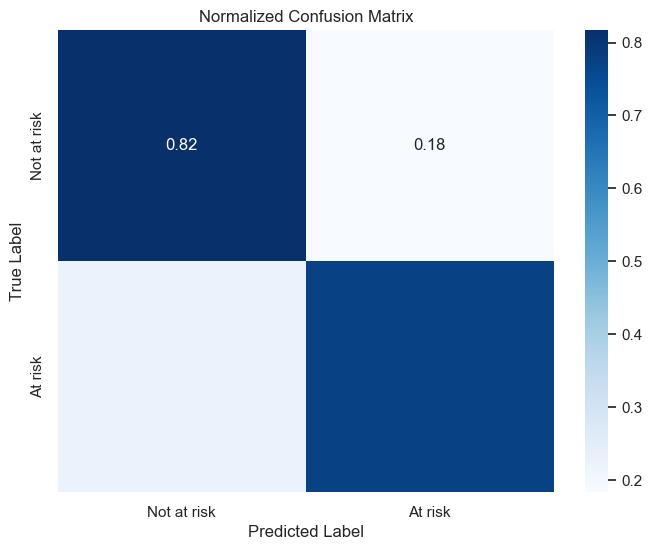

In [159]:
conf_matrix = confusion_matrix(y_test, y_pred_nb, normalize='true')

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='.2f', cmap='Blues', xticklabels=['Not at risk', 'At risk'], yticklabels=['Not at risk', 'At risk'])
plt.title("Normalized Confusion Matrix")
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.grid(False)
plt.show()

###**Model 7: Neural Network**
![](https://juxt-public.s3-eu-west-2.amazonaws.com/img/2-2-2h1b.png)

Implement Keras Model creator function

In [181]:
def create_model(optimizer='adam', kernel_initializer='glorot_uniform'):
    model = Sequential()
    model.add(Dense(12, input_dim=8, kernel_initializer=kernel_initializer, activation='relu'))
    model.add(Dense(8, kernel_initializer=kernel_initializer, activation='relu'))
    model.add(Dense(1, kernel_initializer=kernel_initializer, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

Create sklearn-like estimator using KerasClassifier wrapper

In [182]:
keras_estimator = KerasClassifier(build_fn = create_model, keras_initializer='normal', verbose = 0)

Define hyperparameter grid
- epochs : Integer. Number of epochs to train the model.
  - An epoch is an iteration over the entire x and y data provided. Note that in conjunction with initial_epoch, epochs is to be understood as "final epoch". The model is not trained for a number of iterations given by epochs, but merely until the epoch of index epochs is reached.

- dense_nparams
  - Just your regular densely-connected NN layer.
  - Dense implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True).

- init
  - Initializers define the way to set the initial random weights of Keras layers.

- batch_size : Integer or None. 
  - Number of samples per batch of computation. If unspecified, batch_size will default to 32.

- dropout
  - Applies Dropout to the input.
  - The Dropout layer randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.
  - Note that the Dropout layer only applies when training is set to True such that no values are dropped during inference. When using model.fit, training will be appropriately set to True automatically, and in other contexts, you can set the kwarg explicitly to True when calling the layer.

In [183]:
parameters_nn = {
    'batch_size': [10, 20, 40, 60, 80, 100],
    'epochs': [10, 50, 100],
    'optimizer': ['rmsprop', 'adam', 'adagrad'],
    'init': ['glorot_uniform', 'normal', 'uniform']
    }

Define model and cross-validated randomized search

In [184]:
nn_clf = RandomizedSearchCV(estimator = keras_estimator, 
                            param_distributions = parameters_nn, 
                            n_iter = 100,
                            scoring = 'f1_macro',
                            random_state=42,
                            n_jobs = -1,
                            cv = 3,
                           verbose=2)

Fit the model

In [185]:
nn_clf.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


ValueError: Invalid parameter init for estimator KerasClassifier.
This issue can likely be resolved by setting this parameter in the KerasClassifier constructor:
`KerasClassifier(init=normal)`
Check the list of available parameters with `estimator.get_params().keys()`

Obtain the best hyperparameters

In [ ]:
nn_clf.best_params_

{'batch_size': 8,
 'dense_nparams': 256,
 'dropout': 0.8,
 'epochs': 20,
 'init': 'uniform'}

Predict new data using the trained model

In [ ]:
y_pred_nn = nn_clf.predict(X_test) 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Classification Report
- Precision (0): Proportion of correctly predicted "Not at risk" population to the total predicted "Not at risk" population
- Recall (0): Proportion of total "Not at risk" population found
- Precision (1): Proportion of correctly predicted "At risk" population to the total predicted "At risk" population
- Recall (1): Proportion of total "At risk" population found
- Accuracy: Proportion of correctly predicted "At risk" and "Not at risk" population among total population

In [ ]:
print(classification_report(y_test, y_pred_nn))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93      1530
           1       0.78      0.58      0.66       387

    accuracy                           0.88      1917
   macro avg       0.84      0.77      0.80      1917
weighted avg       0.88      0.88      0.87      1917



Summary of Key Performance Metrics

In [ ]:
print("Accuracy: {}".format(round(accuracy_score(y_test, y_pred_nn), 4)))
print("Precision: {}".format(round(precision_score(y_test, y_pred_nn), 4)))
print("Recall: {}".format(round(recall_score(y_test, y_pred_nn), 4)))
print("F1_score: {}".format(round(f1_score(y_test, y_pred_nn), 4)))

Accuracy: 0.8816
Precision: 0.7778
Recall: 0.5788
F1_score: 0.6637
